In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
     Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked
873       3    1  47.0      0      0   9.0000     47         2
649       3    0  23.0      0      0   7.5500     47         2
713       3    1  29.0      0      0   9.4833     47   

/tmp/ipython-input-193-2190204611.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x_train.fillna(method='ffill', inplace=True)
/tmp/ipython-input-193-2190204611.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x_test.fillna(method='ffill', inplace=True)


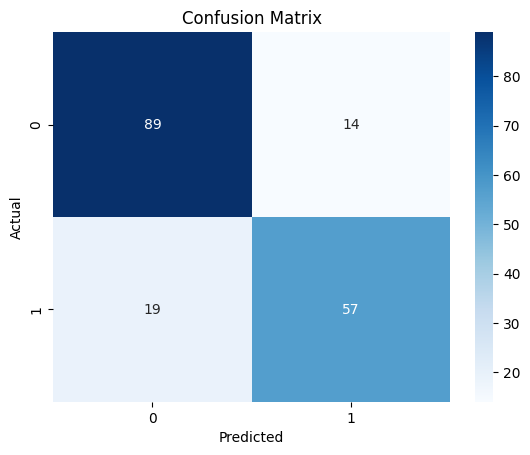

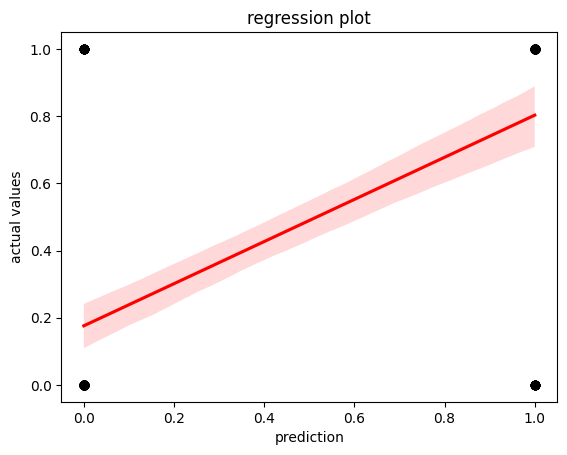

In [ ]:
test_df=pd.read_csv('/content/test.csv')
train_df=pd.read_csv('/content/train.csv')
train_df.info()
train_df.describe()
train_df.duplicated().sum()
train_df.isnull().sum()


x_train.replace('Unknown', np.nan, inplace=True)
x_test.replace('Unknown', np.nan, inplace=True)

x_train.fillna(method='ffill', inplace=True)
x_test.fillna(method='ffill', inplace=True)

for x in train_df.columns:
  if train_df[x].dtype=='object':
    train_df[x]=train_df[x].fillna(train_df[x].mode()[0])
  else:
    train_df[x]=train_df[x].fillna(train_df[x].median())

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for x in train_df.columns:
  if train_df[x].dtype=='object':
    train_df[x]=le.fit_transform(train_df[x])


train_df.drop(columns=['Name','Ticket','PassengerId'],inplace=True)
test_df.drop(columns=['Name','Ticket','PassengerId'],inplace=True)

X=train_df.drop(columns=['Survived'])
y=train_df['Survived']

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)
print(x_train)
print(x_test)
print(y_train)
print(y_test)
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))


from sklearn.metrics import mean_squared_error,r2_score,confusion_matrix,classification_report
mse=mean_squared_error(y_test,y_pred)

rmse=np.sqrt(mse)

r2_score=r2_score(y_test,y_test)*100
r2_score
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
import seaborn as sns
sns.regplot(x=y_pred,y=y_test,line_kws={'color':'red'},color='black')
plt.xlabel('prediction')
plt.ylabel('actual values')
plt.title('regression plot')
plt.show()